In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os


path = os.getcwd()
parent = os.path.dirname(path) # extract parent dir in cross platform way

path_to_plots = os.path.join(parent, "plots")
path_to_data = os.path.join(parent, "data")

In [3]:
train = pd.read_csv(os.path.join(path_to_data, "train_cleaned.csv"))
test = pd.read_csv(os.path.join(path_to_data, "test_cleaned.csv"))

In [4]:
# Separate features and target variable
X = train.drop("Survived", axis=1)
y = train["Survived"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
def gridsearch2table(grid_search):
    """
    Given a GridSearchCV object, return a DataFrame with the mean test accuracy
    for each combination of hyperparameters tested.

    Parameters:
    grid_search (GridSearchCV): The fitted GridSearchCV object.

    Returns:
    pd.DataFrame: A DataFrame with the hyperparameters and their corresponding mean test accuracy.
    or
    pd.io.formats.style.Styler: A Styler object with the hyperparameters and their corresponding mean test accuracy.
    """
    # Extract results from the GridSearchCV object
    results = pd.DataFrame(grid_search.cv_results_)
    
    # Select relevant columns (parameters and mean test score)
    param_columns = [col for col in results.columns if col.startswith('param_')]
    score_column = ['mean_test_score']
    accuracy_table = results[param_columns + score_column]
    
    # Rename columns for better readability
    accuracy_table.columns = [col.replace('param_', '').replace('_', ' ').title() for col in accuracy_table.columns]
    
    # Rename the mean test score column
    accuracy_table = accuracy_table.rename(columns={'Mean Test Score': 'Mean Test Accuracy'})

    # Top 10 by accuracy
    accuracy_table = accuracy_table.sort_values("Mean Test Accuracy", ascending=False).head(10)

    # Use Styler to apply background gradient
    styled_table = accuracy_table.copy().style.background_gradient(cmap='viridis_r', subset=['Mean Test Accuracy'])
    return styled_table
    
    # return accuracy_table


## DecisionTreeClassifier

In [5]:

# Part (a): DecisionTreeClassifier with GridSearchCV
dt_params = {
    'max_depth': range(1, 21),
    'max_features': ['sqrt', 'log2', None] # 'auto' is deprecated
}

dt_clf = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_clf, dt_params, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 21),
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [19]:
gridsearch2table(grid_search_dt)

,Max Depth,Max Features,Mean Test Accuracy
17,6,None,0.808430
14,5,None,0.804891
10,4,log2,0.801335
9,4,sqrt,0.801335
20,7,None,0.799658
11,4,None,0.792610
18,7,sqrt,0.790809
19,7,log2,0.790809
38,13,None,0.787378
2,1,None,0.787378


In [13]:
# Best Decision Tree
best_dt = grid_search_dt.best_estimator_
y_val_pred_dt = best_dt.predict(X_val)
dt_accuracy = accuracy_score(y_val, y_val_pred_dt)

print("Best Decision Tree Parameters:", grid_search_dt.best_params_)
print("Decision Tree Validation Accuracy:", dt_accuracy)
print(classification_report(y_val, y_val_pred_dt))

Best Decision Tree Parameters: {'max_depth': 6, 'max_features': None}
Decision Tree Validation Accuracy: 0.7552447552447552
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        80
           1       0.87      0.52      0.65        63

    accuracy                           0.76       143
   macro avg       0.79      0.73      0.73       143
weighted avg       0.78      0.76      0.74       143



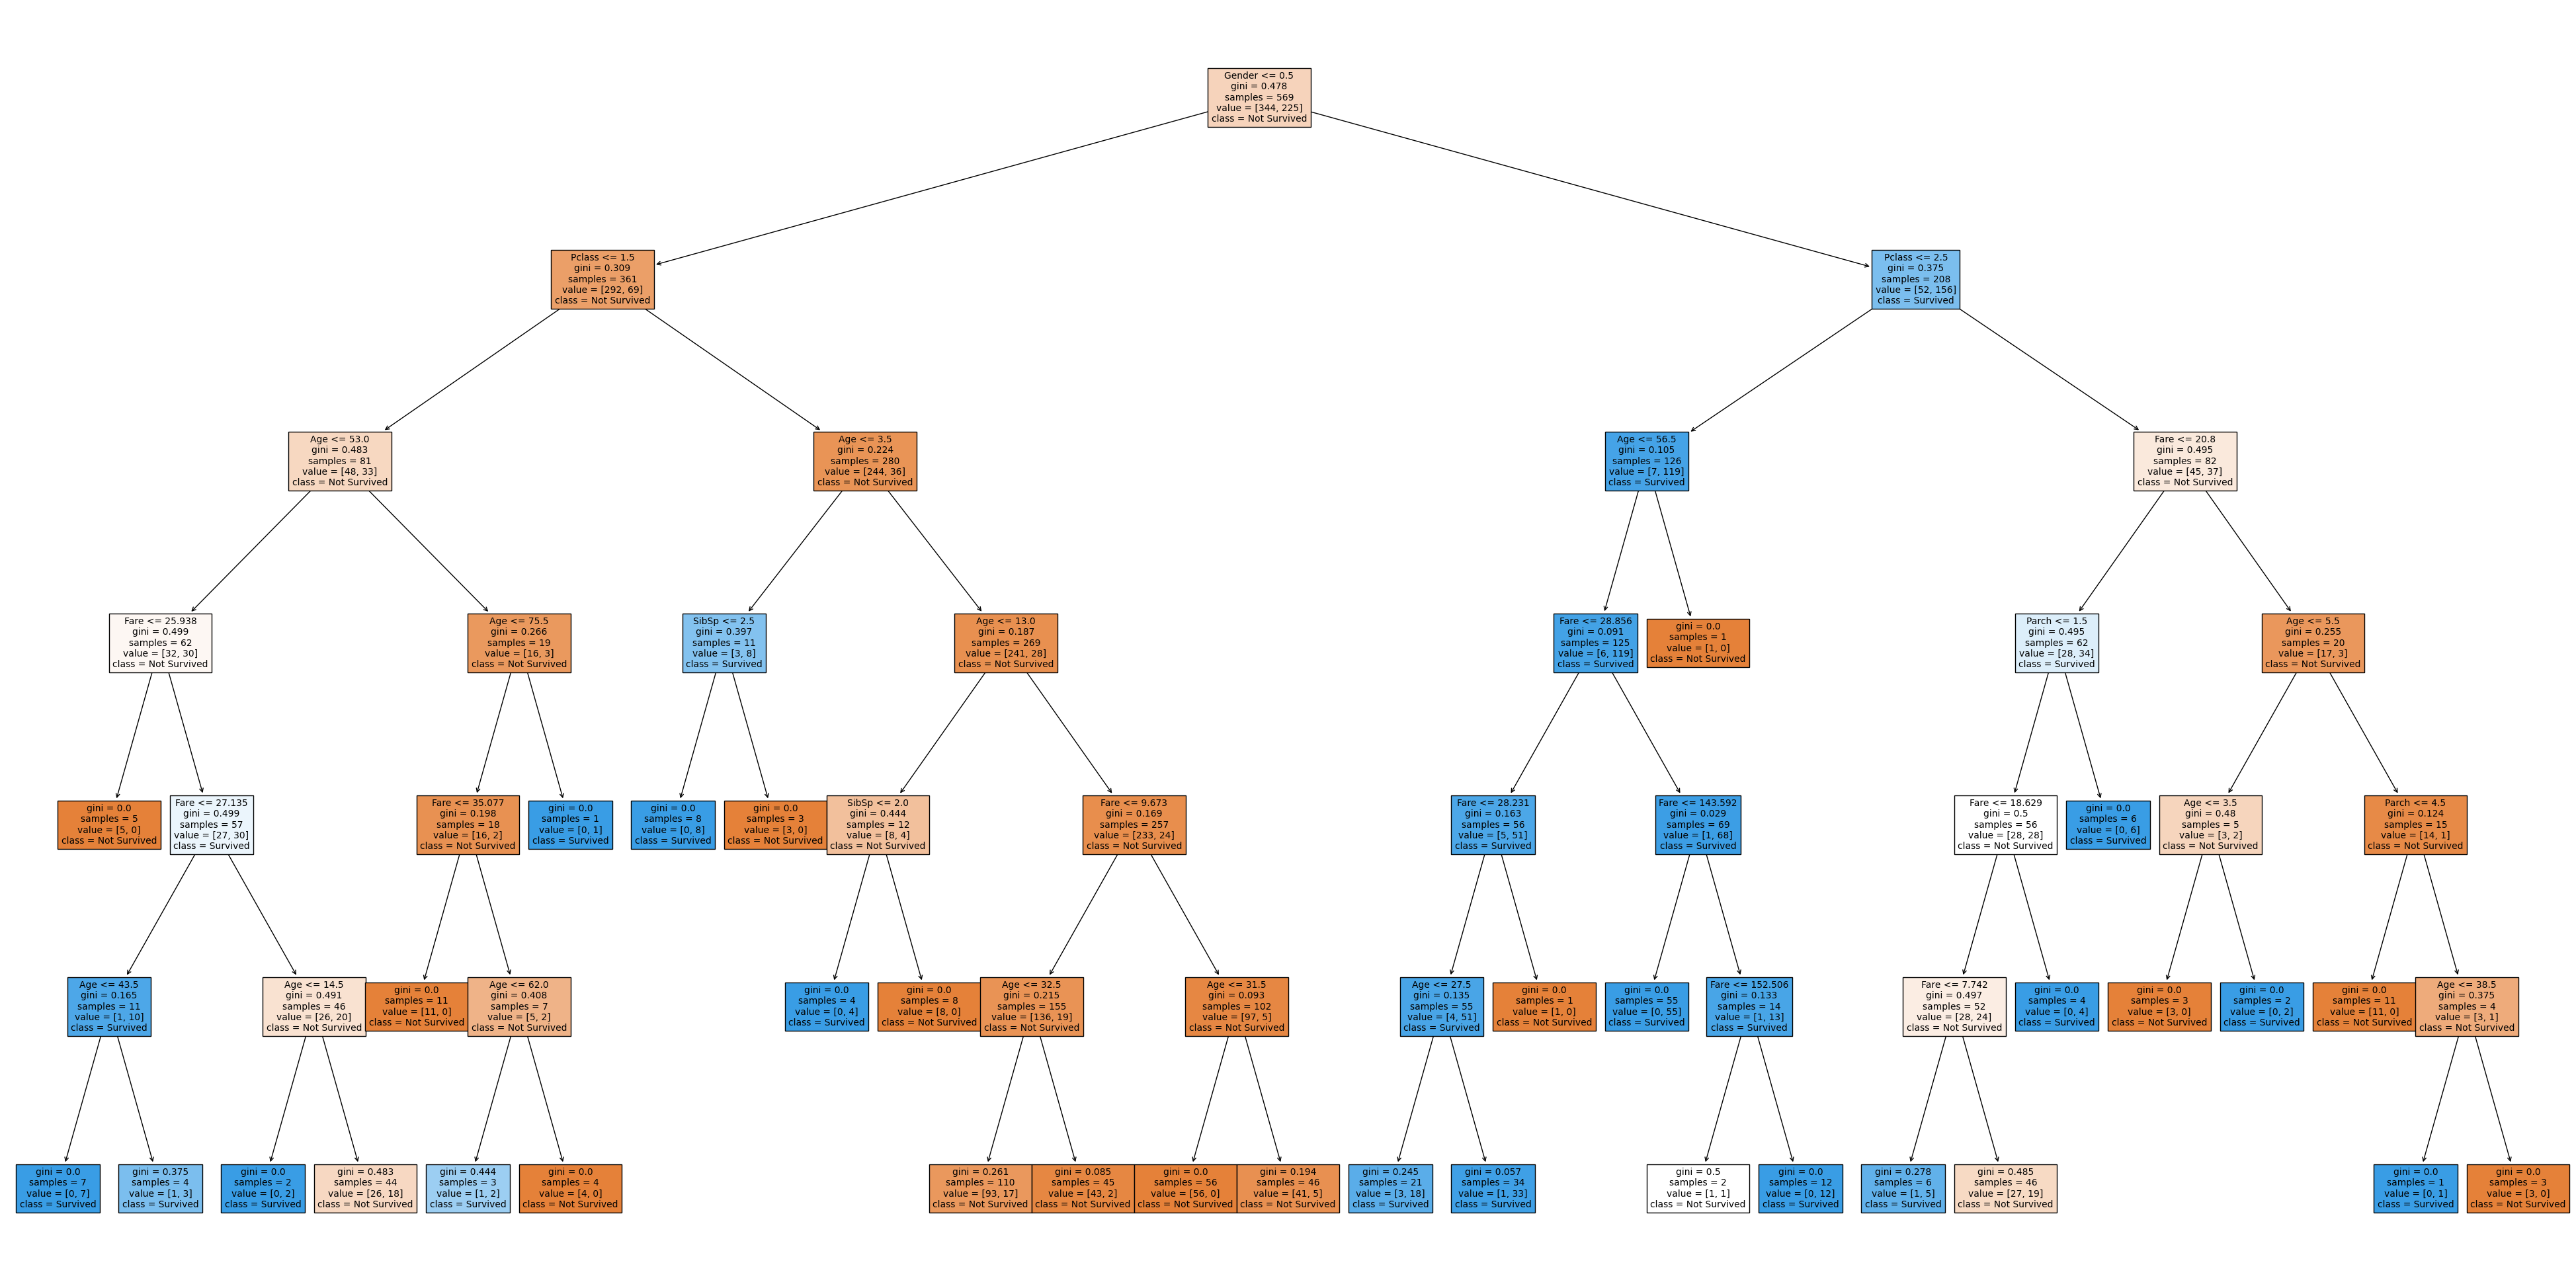

In [20]:
# Visualize the best Decision Tree
plt.figure(figsize=(50,25))
plot_tree(best_dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


In [15]:
# Export tree text representation
tree_text = export_text(best_dt, feature_names=list(X.columns))
print(tree_text)

|--- Gender <= 0.50
|   |--- Pclass <= 1.50
|   |   |--- Age <= 53.00
|   |   |   |--- Fare <= 25.94
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  25.94
|   |   |   |   |--- Fare <= 27.14
|   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  43.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  27.14
|   |   |   |   |   |--- Age <= 14.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  14.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- Age >  53.00
|   |   |   |--- Age <= 75.50
|   |   |   |   |--- Fare <= 35.08
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Fare >  35.08
|   |   |   |   |   |--- Age <= 62.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  62.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  75.50
|   |   |   |   |--- class: 1
|   |--- Pclass >  1.50
|   |   |--- Age <= 3.50
|   |   |   |--- SibSp <= 2.50
|   |   |   

## RandomForestClassifier

In [21]:

# Part (b): RandomForestClassifier with GridSearchCV
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': range(1, 21),
    'max_features': ['sqrt', 'log2', None] # 'auto' is deprecated
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 21),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [22]:
gridsearch2table(grid_search_rf)

,Max Depth,Max Features,N Estimators,Mean Test Accuracy
52,6,None,200,0.819003
43,5,None,200,0.817202
50,6,log2,300,0.815463
47,6,sqrt,300,0.815463
44,5,None,300,0.815448
34,4,None,200,0.815448
53,6,None,300,0.813740
49,6,log2,200,0.813709
46,6,sqrt,200,0.813709
48,6,log2,100,0.813694


In [23]:

# Best Random Forest
best_rf = grid_search_rf.best_estimator_
y_val_pred_rf = best_rf.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)

In [24]:

print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Random Forest Validation Accuracy:", rf_accuracy)
print(classification_report(y_val, y_val_pred_rf))


Best Random Forest Parameters: {'max_depth': 6, 'max_features': None, 'n_estimators': 200}
Random Forest Validation Accuracy: 0.7552447552447552
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        80
           1       0.80      0.59      0.68        63

    accuracy                           0.76       143
   macro avg       0.77      0.74      0.74       143
weighted avg       0.76      0.76      0.75       143



In [19]:
# No test labels yet
# Predict on the test data with the best Random Forest model
test_predictions_rf = best_rf.predict(test.drop("Survived", axis=1))